# Introduction to Social Network Analysis

[Alex Hanna](http://alex-hanna.com), University of Toronto/Google

This is an introduction to social network analysis in R. This introduction aims to accomplish several objectives:

1. Motivate the use of social network analysis
2. Introduce the theoretical basis of network analysis
3. Discuss the potential data sources for network analysis
4. Define network terminology and types of networks
5. Understand how to import network data into R
6. Introduce the R network ecology

### What is Social Network Analysis?

Social network analysis (SNA, also called network analysis, network science, or graph theory) is a body of methods used to study the relationship between entities. Entities can be individuals, organizations, Twitter users, countries, or a mix of any of the above. Network analysis distinguishes itself from other types of analysis because the focus is on the relationship between entities rather than focusing solely on the properties of the entity itself.

### Motivation

Typically, we want to use network analysis if we have a sense that the relationships or transactions between actors/entities are the most critical part of the story. If you have a sense that the interlocking connection between entities is more important than their individual attributes, or if networked connections between entities forces an endogeneity problem which cannot be resolved by more conventional quantitative regression techniques, then network analysis may be a good approach for you to follow.

#### Two examples

Although network analysis as is presented today is sometimes synonymous with computational social science or "big data" methods, network analysis has a long history within sociology and political science. Some of the more innovative uses of network analysis focus on uses that work with [archival and historical data](http://www.themacroscope.org/?page_id=308). 

<img src="img/padgett_ansell.png" alt="Padgett and Ansell 1994" width="450px">

In a classic article, [Padgett and Ansell](https://www.jstor.org/stable/2781822) discuss the rise of the Medici family in 14th-century Florence, Italy. While many families in Florence were attempting to accumulate power and influence within this Renaissance state, the Medici family was able to do so in such a way that outpaced all others. Padgett and Ansell illustrate how they were able to do this using network methods -- namely, they were able to  position themselves as a critical broker in marriage and economic (trade, partnership, and real estate) networks between the larger group of elite Florentine families. 

This is one of my favorite examples because it illustrates a highly complicated network based on data which are over six centuries old. The **actor or entity** here is the elite family. Second, there is not a single type of relationship in this network -- this is a **multiplex** network, meaning there are multiple types of relationships which exist between entities. Relationships are both **undirected** and **directed**, which means they are not all mutual. More on that below. Furthermore, what this means is that the **medium** of what travels across the network tie is different for each network. It is a combination of trust, cooperation, and resources. Third, the data are archival and based upon historical research. The network must be constructed and operationalized explicitly, rather than something like a Twitter retweet, which tends to be accepted somewhat uncritically.

<img src="img/adamic_glance.png" alt="Adamic and Glance 2005" width="450"/>

Compare that to this classic network from [Adamic and Glance](http://www.ramb.ethz.ch/CDstore/www2005-ws/workshop/wf10/AdamicGlanceBlogWWW.pdf) on the political blogosphere circa 2005. This is one of the articles which illustrates the growing political polarization in US political life. The actor here is a political blog. The relationship here is the hyperlink between one blog and another. Because links are by their nature not mutual, this is a directed network. 

In this graph, we have something new and that is the **colors** and **size** in the network. Red actors signify conservative blogs, while blue actors signify liberal ones. Furtermore, red lines represent conservative-to-conservative links, and blue liberal-to-liberal. Orange lines, however, represent cross-ideological relationships. Lastly, size indicates how many links are coming into a particular blog. Those colors and sizes indicate something about the actors themselves; they are **attributes** of the actors.

In the former example, we used network analysis to focus on the *centrality of a particular actor* -- the Medici family. However, in the latter example, we used network analysis to focus on the *structure of the network as a whole* -- namely how between-ideology linkage is much less common than cross-ideology linkage. Both of these could not be achieved by looking at each entity on its own.

#### Theoretical grounding: Relational sociology

The theoreticaly groundings of network analysis are scattered around various disciplines of social science, but [Emirbayer](https://www.jstor.org/stable/10.1086/231209?seq=1) argues most forcefully for its necessary in social science research. Emirbayer poses *relational* or *transactional* analysis as more ontologically sound than *variable-based* or *substantialist* analysis in the social sciences. The focus should be on the interaction between entities, rather than their properties. Individuals may be said to contain attributes (e.g. gender, race, sexual orientation), but a transactional view would indicate that those attributes are all relational (e.g. Desmond and Emirbayer's discussion of [racial domination](https://scholar.harvard.edu/files/mdesmond/files/what_is_racial_domination.pdf)).

This is heady stuff, and I'm not a theorist, so I don't want to get lost in the weeds. The main takeaway is that, as network analysts, we start to see networks everywhere, and this is our starting point. We also have to take caution in determining whether a network is the best way to approach the problem or whether there are better methods to do this.

#### Exercise 1

1. Reflect on your own research interests. What is a type of network which would be of interest to you in your work?

In [30]:
## loading igraph for some basic drawings
library(igraph)

### Terms

Let's get to defining some terms before we go on, so that we're on the same page. So far I've been using the terms *entities* or *actor* to talk about individuals in network analysis. From now on, I will more often use the term **node** to discuss the entity who is part of the relationship. The terms actor or vertex are synonyms for this.

The connection between two nodes is called an **edge** (or arc, link, or relation). A network with two nodes and a single edge is called a **dyad**.

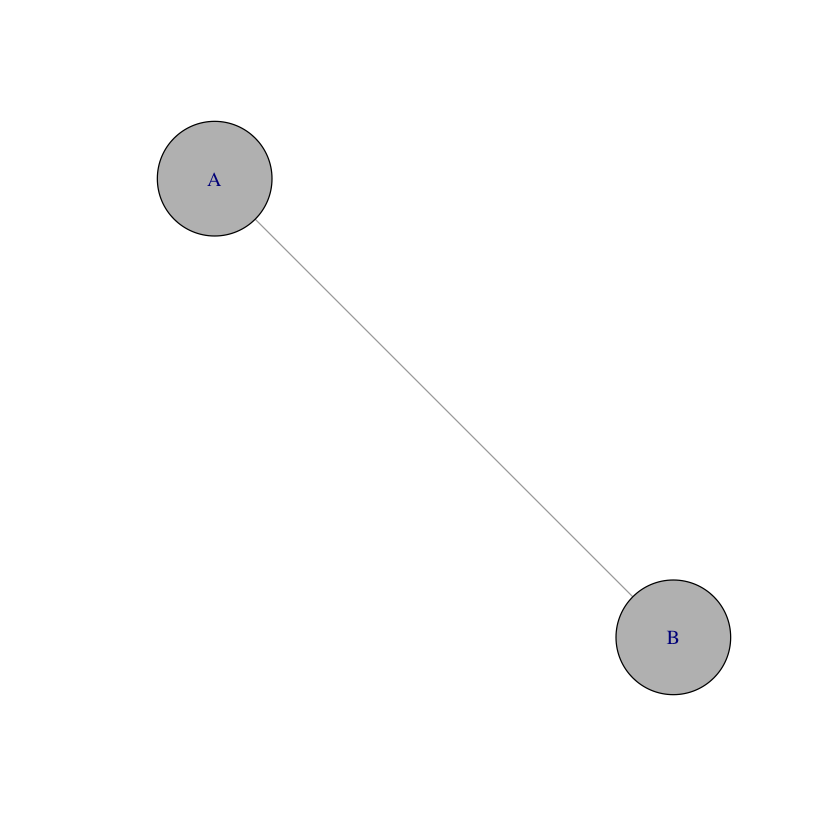

In [26]:
## a dyad
net <- graph_from_literal(A-B)
plot(net, vertex.color = "gray", vertex.size = 50)

A network with three nodes, with any type of configuration of edges between them, is called a **triad**.

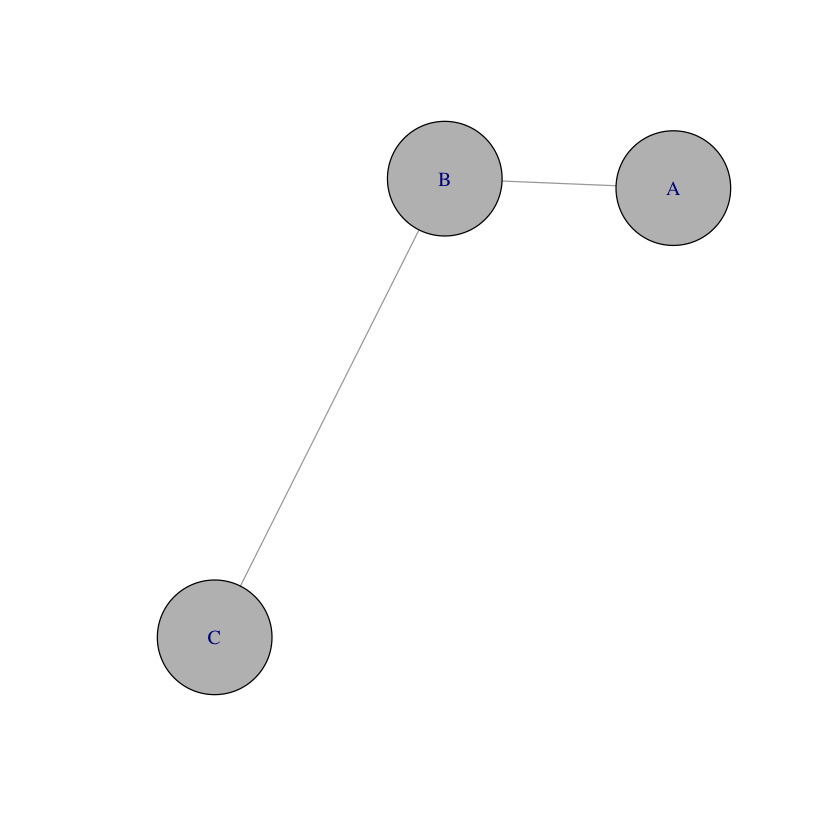

In [27]:
## a triad 
net <- graph_from_literal(A-B-C)
plot(net, vertex.color = "gray", vertex.size = 50)

You'll see that I'm using a funny little function to draw these networks above called `graph_from_literal`. This lets me literally draw some basic networks using a rudimentary simple syntax. What I want to draw attention to is the name of the function, namely the first word: **graph**. A **graph** is another name for a network and is a term much more common on computer science. A **subgraph** is any subset of a graph. In the network below, the nodes B, C, and D (highlighted in gold) form a subgraph of the larger graph.

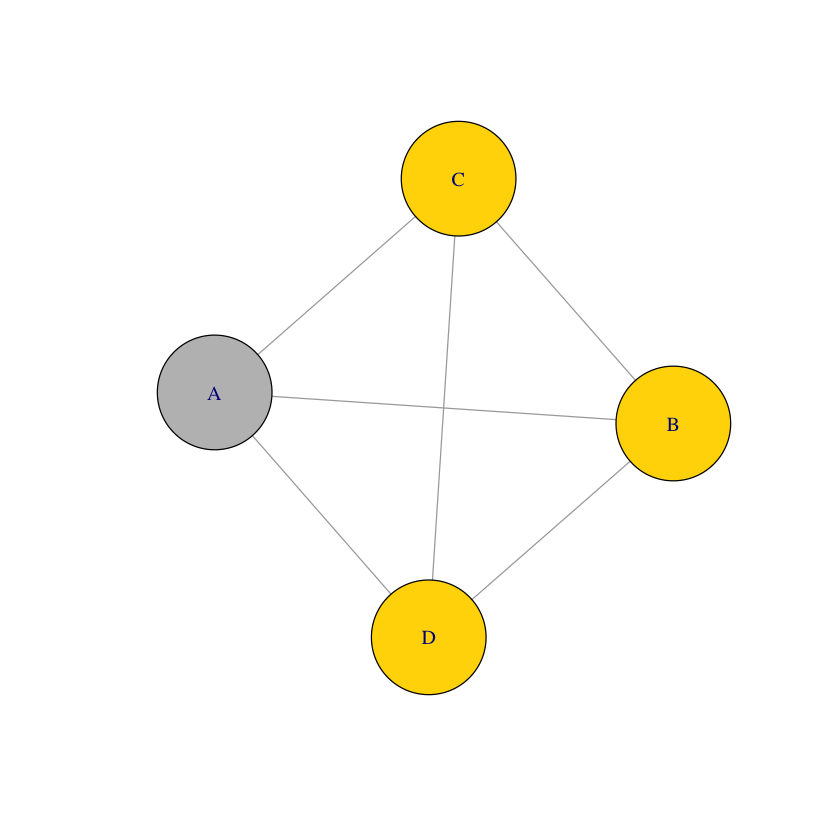

In [36]:
net <- graph_from_literal(A:B:C:D - A:B:C:D)
V(net)$color <- c('gray', 'gold', 'gold', 'gold')
plot(net, vertex.size = 50)

A **component** is a subgraph which is connected together. In the plot below, nodes A through E are a component. Nodes G-H, I-J, K-L-M, and N are components. The largest component is called the **major component** while the others are called **minor components**. N is a special kind of component which is by itself and thus called an **isolate**.

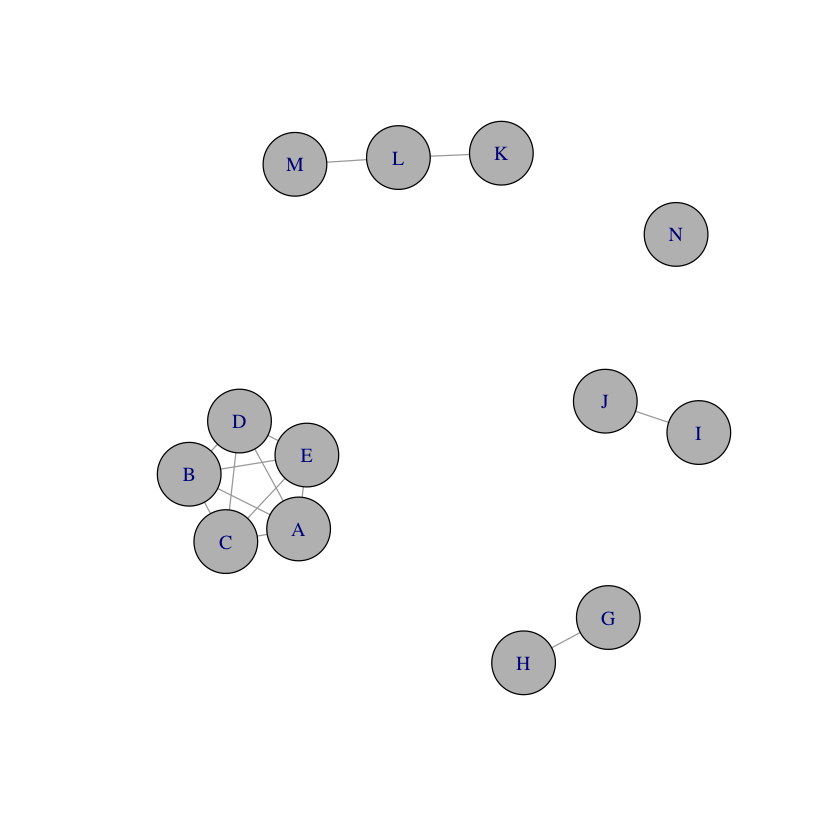

In [42]:
net <- graph_from_literal(A:B:C:D:E - A:B:C:D:E, G-H, I-J, K-L-M, N)
plot(net, vertex.color = 'gray', vertex.size = 25)

- Types of networks
    - Properties
        - Directed vs. undirected
        - Weighted vs. unweighted
        - Multiplex
        - Self-loops
        - Static versus dynamic
    - One-mode vs two-mode
        - Brieger duality

- Exercise 2
- Data sources
    - Ethnographic
    - Interviews
    - Surveys
    - Digital
    - Archival
- Data formats
    - Adjacency
    - Edgelist
    - Incidence matrix
- R packages
    - `igraph`
    - `sna`
    - `statnet`
    - `tidygraph` + `ggraph`
- Exercise 3